<a href="https://colab.research.google.com/github/VasumathiBurugu/java-plum-leaf-disease-/blob/master/java_plum_leaf_disease1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive

'CAS SciFinder-userguide..docx'
'Colab Notebooks'
 dexian.gslides
 GEE_Exports
'Java Plum Leaf Disease Dataset'
'KnackTech Group Discussion round on 28th April__.xlsx'
'KnackTech Virtual Interview on 1st May.xlsx'
'Main plum leaf dataset'
'NDLI_ Computer Science and Applications (Paper I & II) Question Paper UGC-NET December 2020 & June 2021.pdf'
'NDLI_ Computer Science and Applications (Paper I & II) Question Paper UGC-NET December 2021 & June 2022.pdf'
'NDLI_ Computer Science and Applications (Paper I & II) Question Paper UGC-NET December 2022 (Shift 1).pdf'
'NDLI_ Computer Science and Applications (Paper I & II) Question Paper UGC-NET December 2022 (Shift 2).pdf'
'NDLI_ Computer Science and Applications (Paper I & II) Question Paper UGC-NET December 2023.pdf'
'NDLI_ Computer Science and Applications (Paper I & II) Question Paper UGC-NET June 2020.pdf'
'NDLI_ General Paper on Teaching & Research Aptitude (Paper I) Question Paper UGC-NET 6th December 2023 (Shift 1).pdf'
'NDLI_ General

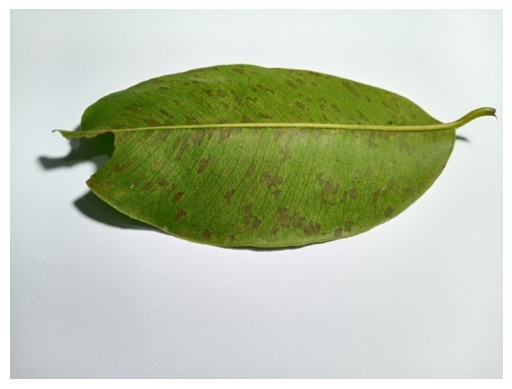

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "/content/drive/MyDrive/Main plum leaf dataset/Compressed Data/Bacterial_Spot/Bacterial_Spot (1).jpg"
img = Image.open(image_path)
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

In [41]:
import os

# Define the path
compressed_data_path = "/content/drive/MyDrive/Main plum leaf dataset/Compressed Data"

# List all class folders
classes = [folder for folder in os.listdir(compressed_data_path) if os.path.isdir(os.path.join(compressed_data_path, folder))]
print("✅ Classes (Folders) inside 'Compressed Data':", classes)


✅ Classes (Folders) inside 'Compressed Data': ['Powdery_Mildew', 'Sooty_Mold', 'Healthy', 'Dry', 'Bacterial_Spot', 'Brown_Blight']


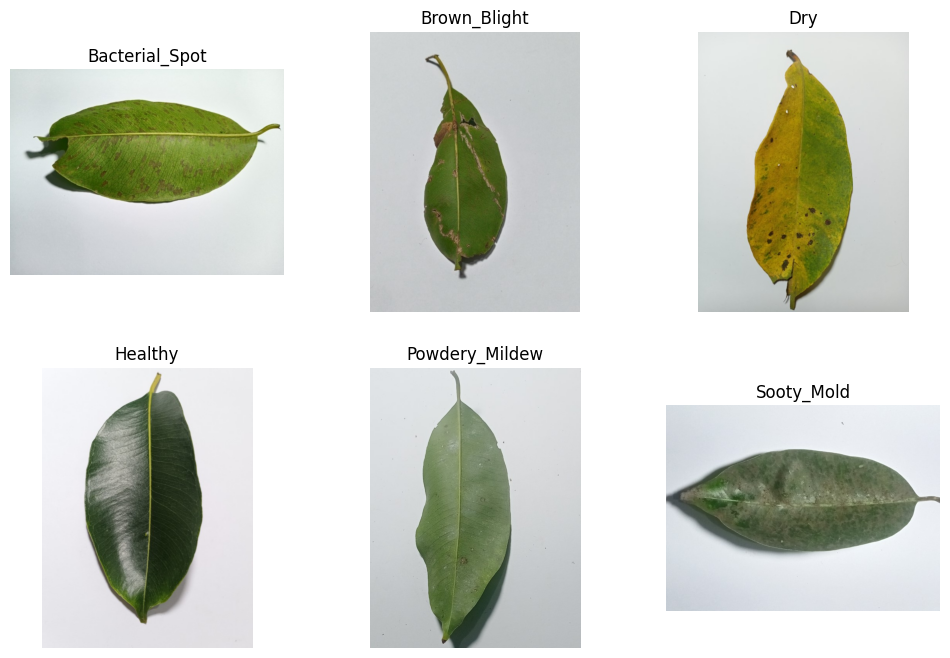

In [42]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Sort class names in ascending order
sorted_classes = sorted(classes)

# Display images from each sorted class
plt.figure(figsize=(12, 8))

for i, class_name in enumerate(sorted_classes[:6]):  # Show up to 6 classes
    class_path = os.path.join(compressed_data_path, class_name)

    # Get image files from the class
    image_files = sorted([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])  # Sort image names

    if image_files:  # If images exist
        img_path = os.path.join(class_path, image_files[0])  # Take first image
        img = Image.open(img_path)

        plt.subplot(2, 3, i+1)  # Create a 2-row, 3-column grid
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)  # Show class name

plt.show()


In [43]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Dataset Path
dataset_path = "/content/drive/MyDrive/Main plum leaf dataset/Compressed Data"

# Get class names (sorted for consistency)
class_names = sorted([folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))])
num_classes = len(class_names)  # Automatically detect number of classes

# Image Parameters
input_shape = (32, 32, 3)  # Resize images to 32x32

# Load Images & Labels
images, labels = [], []

for class_index, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        img = load_img(img_path, target_size=(32, 32))  # Resize to match CIFAR-100
        img_array = img_to_array(img) / 255.0  # Normalize to [0,1]

        images.append(img_array)
        labels.append(class_index)  # Store class index as label

# Convert to NumPy Arrays
images = np.array(images, dtype="float32")
labels = np.array(labels, dtype="int")

# Split into Train & Test Sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Print Dataset Info
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")
print(f"Number of Classes: {num_classes}")


x_train shape: (1920, 32, 32, 3) - y_train shape: (1920,)
x_test shape: (480, 32, 32, 3) - y_test shape: (480,)
Number of Classes: 6


In [44]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 10  # For real training, use num_epochs=100. 10 is a test value
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]  # Size of the dense layers of the final classifier

In [45]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [46]:
print(mlp_head_units)

[2048, 1024]


In [47]:
from tensorflow.keras import layers, ops, Sequential # Import layers from tensorflow.keras
import keras
# ... (rest of the imports)

data_augmentation = keras.Sequential([ # Or use Sequential without keras if imported directly
    layers.Rescaling(1./255),  # Normalize images
    layers.RandomFlip("horizontal"),  # Random horizontal flip
    layers.RandomRotation(0.1),  # Slight rotation
])
# ... (rest of the code)

In [48]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random  # Import random to choose a random image
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Import for loading images

# ... (your other imports and code) ...

# 🔹 Define load_random_image function:
def load_random_image():
    """Loads a random image from the dataset path."""
    # Assuming 'dataset_path' is defined (update with your actual path)
    all_image_paths = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            all_image_paths.extend([os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    # Choose a random image path
    random_image_path = random.choice(all_image_paths)

    # Load and preprocess the image
    img = load_img(random_image_path, target_size=(image_size, image_size))  # Resize to image_size
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]

    return img_array

# 🔹 Load a Random Image from Dataset
image = load_random_image()  # Call the defined function

# ... (rest of your visualization code remains the same) ...

✅ Image size: 72 X 72
✅ Patch size: 6 X 6
✅ Patches per image: 144
✅ Elements per patch: 108


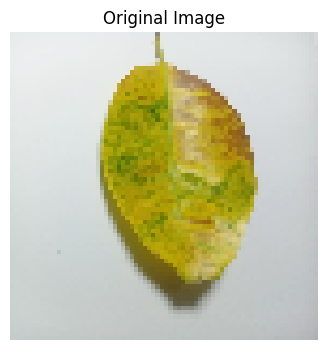

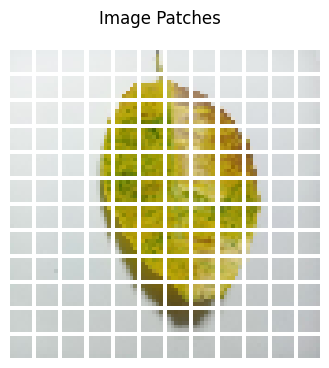

In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# ... (your other imports and code) ...




# 🔹 Load a Random Image from Dataset
image = load_random_image()  # Replace with your image loading logic

# 🔹 Display Original Image
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")

# 🔹 Reshape & Convert Image
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
resized_image = tf.cast(resized_image, dtype='float32')  # Convert to float32

# 🔹 Patching Class for Visualization (Renamed to avoid conflict)
class ImagePatches(tf.keras.layers.Layer):
    """Create image patches of size (patch_size x patch_size)."""
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dim = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dim])
        return patches

# 🔹 Generate Patches
patches = ImagePatches(patch_size)(resized_image)

# 🔹 Print Patch Info
print(f"✅ Image size: {image_size} X {image_size}")
print(f"✅ Patch size: {patch_size} X {patch_size}")
print(f"✅ Patches per image: {patches.shape[1]}")
print(f"✅ Elements per patch: {patches.shape[-1]}")

# 🔹 Display Image Patches
n = int(np.sqrt(patches.shape[1]))  # Grid size
plt.figure(figsize=(4, 4))

for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy()) # Convert to NumPy for display
    plt.axis("off")

plt.suptitle("Image Patches", fontsize=12)
plt.show()

In [51]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

In [52]:
from tensorflow.keras import layers, ops # Add this line to import ops

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(  # Use ops.expand_dims
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0  # Use ops.arange
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

In [63]:
# ✅ Define ViT Classifier
def create_vit_classifier():
    inputs = keras.Input(shape=(image_size, image_size, 3))  # Input image shape (72, 72, 3)

    # 🔹 Step 1: Data Augmentation
    augmented = data_augmentation(inputs)

    # 🔹 Step 2: Create Patches
    patches = Patches(patch_size)(augmented)

    # 🔹 Step 3: Encode Patches
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # 🔹 Step 4: Transformer Blocks
    for _ in range(transformer_layers):
        # Layer normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

        # Multi-head attention
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)

        # Skip connection 1
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)

        # MLP block
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)

        # Skip connection 2
        encoded_patches = layers.Add()([x3, x2])

    # 🔹 Step 5: Final Classification Layers
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    # MLP head
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)

    # Classification layer (num_classes = 6 based on your dataset)
    logits = layers.Dense(num_classes)(features)

    # 🔹 Step 6: Create the Model
    model = keras.Model(inputs=inputs, outputs=logits)
    return model



In [54]:
model =  create_vit_classifier()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 72, 72, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 72, 72, 3) │          0 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, None, 108) │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, 144, 64)   │     16,192 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 144, 64)   │        128 │ patch_encoder[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 144, 128)  │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 144, 64)   │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 144, 64)   │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 144, 64)   │          0 │ dropout_2[0][0],  │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 144, 128)  │          0 │ dense_3[0][0]   

 Total params: 21,662,662 (82.64 MB)

 Trainable params: 21,662,662 (82.64 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Load dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Main plum leaf dataset/Compressed Data", # Replace with the actual dataset path
    image_size=(image_size, image_size),
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Main plum leaf dataset/Compressed Data", # Replace with the actual dataset path
    image_size=(image_size, image_size),
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=42
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Main plum leaf dataset/Compressed Data", # Replace with the actual dataset path
    image_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False
)

Found 2400 files belonging to 6 classes.
Using 1920 files for training.
Found 2400 files belonging to 6 classes.
Using 480 files for validation.
Found 2400 files belonging to 6 classes.


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.1595 - loss: 10.2592 - top-5-accuracy: 0.8335 - val_accuracy: 0.2396 - val_loss: 2.3535 - val_top-5-accuracy: 0.8604
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 838ms/step - accuracy: 0.1702 - loss: 2.9810 - top-5-accuracy: 0.8628 - val_accuracy: 0.1333 - val_loss: 1.8750 - val_top-5-accuracy: 0.8208
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 988ms/step - accuracy: 0.1765 - loss: 2.0775 - top-5-accuracy: 0.8162 - val_accuracy: 0.1521 - val_loss: 1.8386 - val_top-5-accuracy: 0.8146
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1703 - loss: 1.8860 - top-5-accuracy: 0.8174 - val_accuracy: 0.1750 - val_loss: 1.7914 - val_top-5-accuracy: 0.8438
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 854ms/step - accuracy: 0.1470 - loss: 1.8189 - top-5-accuracy: 0.8309 - val_accuracy: 0.1354 - val_loss: 1.7925 - val_top-5-accuracy: 0.9104
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 937ms/step - accuracy: 0.1625 - loss: 1.7974 - top-5-accuracy:

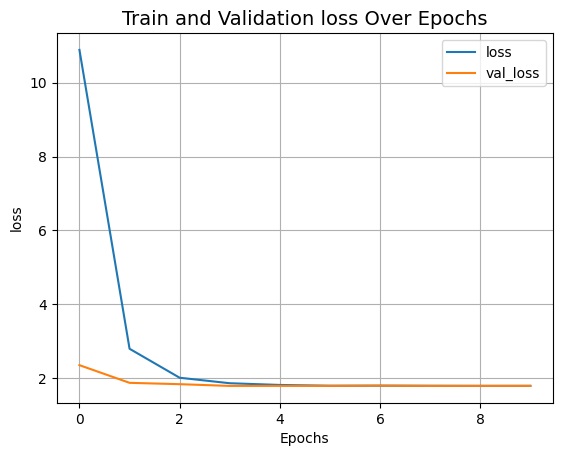

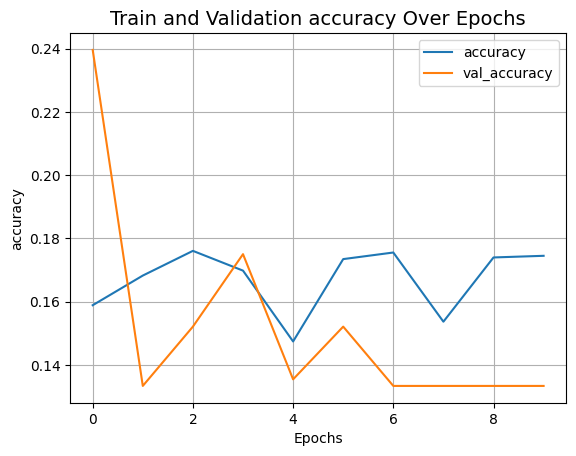

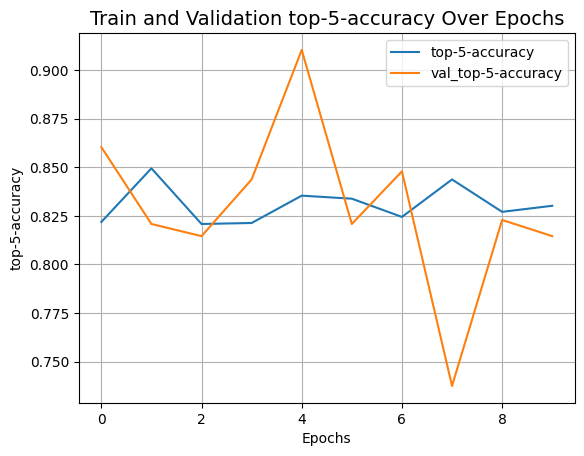

In [57]:
# Define experiment function
def run_experiment(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        batch_size=batch_size,
        epochs=num_epochs,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)

    # ✅ Create and Load test_dataset (before evaluation)
    test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/drive/MyDrive/Main plum leaf dataset/Compressed Data",  # ✅ Replace with your actual dataset path
        image_size=(image_size, image_size),
        batch_size=batch_size,
        validation_split=0.2,
        subset="validation",  # or create a separate test folder and use 'test' here
        seed=42
    )

    # Evaluate on test dataset
    results = model.evaluate(test_dataset)
    test_loss, accuracy, top_5_accuracy = results
    print(f"Test Loss: {round(test_loss, 4)}")
    print(f"Test Accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test Top-5 Accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

# ... (rest of the code)
    return history

# Define the plot_history function outside run_experiment
def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

# Call run_experiment and then plot_history
vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

plot_history("loss")
plot_history("accuracy")
plot_history("top-5-accuracy")

# EVALUATION METRICS

In [58]:
!pip install tensorflow scikit-learn

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score

# ... (Your other code: create_vit_classifier, load_random_image, etc.) ...

def evaluate_model(model, test_dataset):
    y_true = []
    y_pred = []
    y_scores = []  # For AUC calculation

    for images, labels in test_dataset:
        predictions = model.predict(images)
        y_scores.extend(predictions)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_scores = np.array(y_scores)

    # Compute classification report
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

    # Compute AUC score (One-vs-Rest)
    auc_score = roc_auc_score(y_true, y_scores, multi_class="ovr")
    print(f"AUC Score: {auc_score:.4f}")

def run_experiment(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    # 🐛 Fix: Use SparseCategoricalCrossentropy and appropriate metrics
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # For integer labels
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            # 🐛 Fix: Removed Precision and Recall (not compatible with SparseCategoricalCrossentropy)
            # Instead, calculate them manually after training in evaluate_model
        ],
    )

    # ... (Rest of your run_experiment function: checkpoint, fit, etc.) ...

    # ... (Load test_dataset) ...

    # Evaluate on test dataset
    results = model.evaluate(test_dataset)
    test_loss, accuracy = results  # 🐛 Fix: Match the number of metrics

    print(f"Test Loss: {round(test_loss, 4)}")
    print(f"Test Accuracy: {round(accuracy * 100, 2)}%")

    # 🐛 Fix: Evaluate with precision, recall, F1-score, and AUC after training
    evaluate_model(model, test_dataset)

    return history

# ... (Rest of your code: create and train the model, plot history) ...

In [66]:
num_classes = len(train_dataset.class_names)
class_names = train_dataset.class_names

# Define function to compute additional evaluation metrics
def evaluate_model(model, test_dataset):
    y_true = []
    y_pred = []
    y_scores = []  # For AUC calculation

    for images, labels in test_dataset:
        predictions = model.predict(images)
        y_scores.extend(predictions)  # Raw scores for AUC
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_scores = np.array(y_scores)

    # Compute classification report
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

    # Compute AUC score (One-vs-Rest)
    auc_score = roc_auc_score(y_true, y_scores, multi_class="ovr")
    print(f"AUC Score: {auc_score:.4f}")

def run_experiment(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    # Remove 'from_logits' from Precision and Recall
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.Precision(name="precision"),
            keras.metrics.Recall(name="recall"),
        ],
    )

    # ... (rest of the function remains the same)

    # ... (rest of the function remains the same) ...

    # ... (rest of the function remains the same) ...

    # ... (rest of the code is the same) ...

    checkpoint_filepath = "/tmp/checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        batch_size=batch_size,
        epochs=num_epochs,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)

    # Evaluate model on test dataset
    results = model.evaluate(test_dataset)
    test_loss, accuracy, precision, recall = results
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)  # Avoid division by zero

    print(f"\nTest Loss: {round(test_loss, 4)}")
    print(f"Test Accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test Precision: {round(precision * 100, 2)}%")
    print(f"Test Recall: {round(recall * 100, 2)}%")
    print(f"Test F1-Score: {round(f1_score * 100, 2)}%")

    # Compute detailed evaluation metrics
    evaluate_model(model, test_dataset)

    return history

# Create ViT model
vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

# Plot training history
def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title(f"Train and Validation {item} Over Epochs", fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

plot_history("loss")
plot_history("accuracy")
plot_history("precision")
plot_history("recall")
plot_history("f1_score")
plot_history("auc_score")

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node LogicalAnd_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-66-f7d7d4185d05>", line 88, in <cell line: 0>

  File "<ipython-input-66-f7d7d4185d05>", line 60, in run_experiment

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 84, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 490, in compute_metrics

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 334, in update_state

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 21, in update_state

  File "/usr/local/lib/python3.11/dist-packages/keras/src/metrics/confusion_metrics.py", line 378, in update_state

  File "/usr/local/lib/python3.11/dist-packages/keras/src/metrics/metrics_utils.py", line 592, in update_confusion_matrix_variables

  File "/usr/local/lib/python3.11/dist-packages/keras/src/metrics/metrics_utils.py", line 565, in weighted_assign_add

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 3617, in logical_and

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 1520, in logical_and

required broadcastable shapes
	 [[{{node LogicalAnd_1}}]] [Op:__inference_multi_step_on_iterator_216622]

# CONFUSION MATRIX

In [30]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to evaluate model and plot confusion matrix
def evaluate_model(model, test_dataset, class_names):
    y_true = []
    y_pred = []

    # Generate predictions
    for images, labels in test_dataset:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix for Plum Leaf Disease")
    plt.show()

# Define class names based on your dataset labels
class_names = ["Healthy", "Bacterial Spot", "Rust", "Other Disease"]  # Modify based on actual labels

# Run experiment and evaluate with confusion matrix
vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)
evaluate_model(vit_classifier, test_dataset, class_names)


NameError: name 'create_vit_classifier' is not defined

# TRANSFER LEARNING

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub  # Hub for pretrained ViT models
import matplotlib.pyplot as plt

# ✅ Set parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 9  # Adjust based on dataset
EPOCHS = 150
LEARNING_RATE = 0.0001

# ✅ Load Plum Leaf Disease dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    "plum_leaf_dataset/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    "plum_leaf_dataset/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    "plum_leaf_dataset/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# ✅ Load a pretrained ViT model from TensorFlow Hub
vit_url = "https://tfhub.dev/google/vit_base_patch16_224/1"
vit_base = hub.KerasLayer(vit_url, trainable=False)

# ✅ Define a custom classification model
inputs = keras.Input(shape=(224, 224, 3))
x = vit_base(inputs)  # Pass input through ViT
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)  # New classification head

model = keras.Model(inputs, outputs)

# ✅ Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Train the model (only the new layers)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

# ✅ Fine-tune the entire ViT model (optional)
vit_base.trainable = True  # Unfreeze ViT layers for fine-tuning
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE / 10),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5  # Train for a few more epochs
)

# ✅ Evaluate performance
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# ✅ Plot accuracy curves
def plot_history(history, title):
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(title)
    plt.grid()
    plt.show()

plot_history(history, "Initial Training Accuracy")
plot_history(history_finetune, "Fine-Tuning Accuracy")


NotFoundError: Could not find directory plum_leaf_dataset/train

# FINE TUNING

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import matplotlib.pyplot as plt

# ✅ Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 9  # Adjust based on Plum Leaf Dataset
EPOCHS_TRANSFER = 150  # Initial transfer learning
EPOCHS_FINE_TUNE = 10  # Fine-tuning phase
LEARNING_RATE = 0.0001

# ✅ Load Plum Leaf Disease Dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    "plum_leaf_dataset/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    "plum_leaf_dataset/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    "plum_leaf_dataset/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# ✅ Load Pretrained ViT model (from TensorFlow Hub)
vit_url = "https://tfhub.dev/google/vit_base_patch16_224/1"
vit_base = hub.KerasLayer(vit_url, trainable=False)  # Freeze ViT layers

# ✅ Build the Transfer Learning Model
inputs = keras.Input(shape=(224, 224, 3))
x = vit_base(inputs)  # Pass input through ViT
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)  # Classification head

model = keras.Model(inputs, outputs)

# ✅ Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Train (Transfer Learning Phase)
print("Training Transfer Learning Model...")
history_transfer = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_TRANSFER
)

# ✅ Fine-Tuning: Unfreeze ViT layers & train at a lower LR
vit_base.trainable = True  # Unfreeze transformer layers

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE / 10),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Train (Fine-Tuning Phase)
print("Fine-Tuning Model...")
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FINE_TUNE
)

# ✅ Evaluate Model on Test Data
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# ✅ Plot Training History
def plot_history(history, title):
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(title)
    plt.grid()
    plt.show()

plot_history(history_transfer, "Transfer Learning Accuracy")
plot_history(history_finetune, "Fine-Tuning Accuracy")
